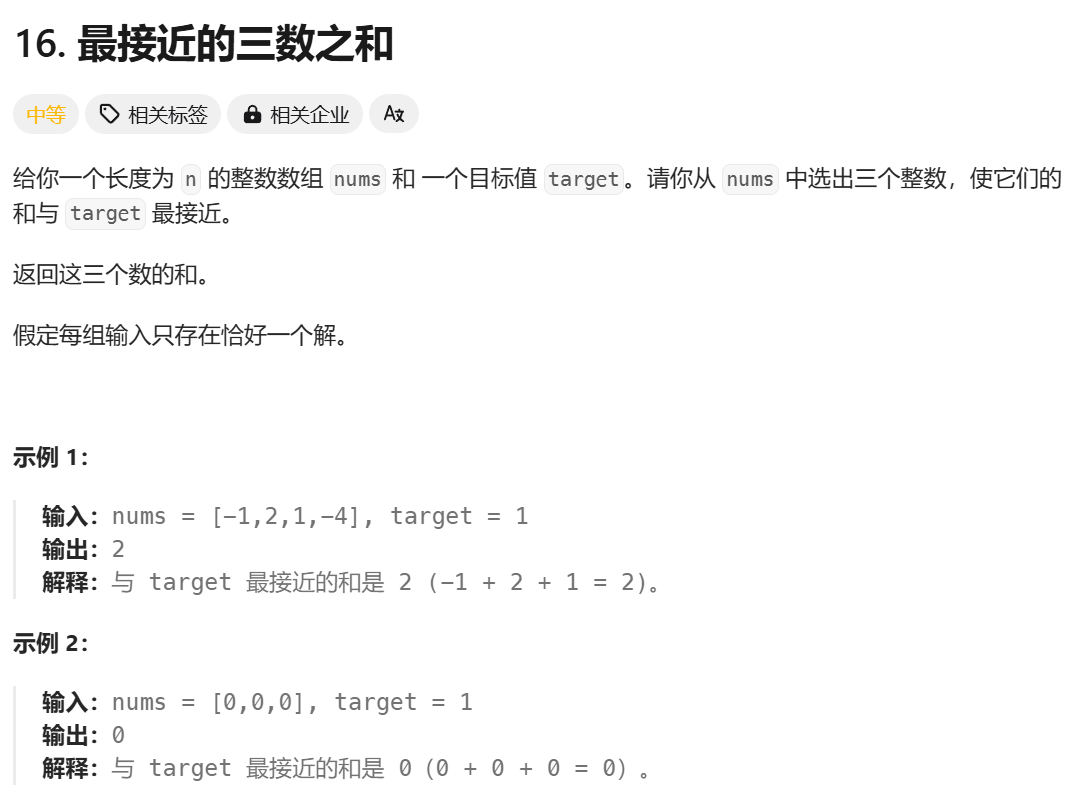

## 和前面一题差不多
- 先是第一个指针 O（n）然后双指针O(n)(同进退)
- 怎么判断最接近
  - 相等直接输出
  - 不相等继续找并更新

In [2]:
from typing import List

class Solution:
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        size = len(nums)
        nums = sorted(nums)
        ans = nums[0] + nums[1] + nums[2] # ans = sum(nums[:3])
        # 外循环
        for first in range(0, size - 2):
            if first > 0 and nums[first] == nums[first - 1]:
                continue
            Target = target - nums[first]
            left, right = first + 1, size - 1 
            while left < right:
                temp = nums[left] + nums[right]
                if temp < Target:
                    if abs(target - ans) > abs(target - temp - nums[first]):
                        ans = temp + nums[first]
                    left += 1
                elif temp > Target:
                    if abs(target - ans) > abs(target - temp - nums[first]):
                        ans = temp + nums[first]
                    right -= 1
                # 找到了目标值直接返回了
                else:
                    return target
        return ans
                    
a = Solution()
a.threeSumClosest([0,0,0], 1)

0

## 有的剪枝很好

In [7]:
from cmath import inf
from typing import List

class Solution:
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        size = len(nums)
        nums = sorted(nums)
        ans = inf

        # 外循环
        for first in range(0, size - 2):
            if first > 0 and nums[first] == nums[first - 1]:
                continue
            Target = target - nums[first]
            left, right = first + 1, size - 1 

            # 剪枝
            min = nums[first] + nums[first + 1] + nums[first + 2]
            if min > target: # 当前循环 最小的都比目标大后面就不用找了
                if min - target < abs(ans - target):
                    ans = min
                break  # 说明整个循环没有更好结果了

            max = nums[first] + nums[right] + nums[right - 1] # 当前大循环的最大值
            if max < target: # 当前循环 最大的都比目标小前面小的就不用找了        
                if target - max < abs(ans - target):
                    ans = max
                continue # 这只能说明当前循环不会有更好结果了

            # 双指针
            while left < right:
                temp = nums[left] + nums[right]
                if temp < Target:
                    if abs(target - ans) > abs(target - temp - nums[first]):
                        ans = temp + nums[first]
                    left += 1
                elif temp > Target:
                    if abs(target - ans) > abs(target - temp - nums[first]):
                        ans = temp + nums[first]
                    right -= 1
                # 找到了目标值直接返回了
                else:
                    return target
        return ans
                    
a = Solution()
a.threeSumClosest([-1,2,1,-4], 1)

2